<a href="https://colab.research.google.com/github/SkymanOne/COMP3217_CW2/blob/main/COMP3217_CW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3217 ML for Security Coursework

Inspired by [the lab](https://colab.research.google.com/github/jomar0/comp3217lab2/blob/main/comp3217_lab2.ipynb).

## PART A

Binary classification of logs.

Run steps:
 1. [Prelude](#A-1)
 2. [XGBoost scores (optional)](#A-2)
 3. [XGBoost output](#A-3)





### Prelude
<a name="A-1"></a>

In [160]:
import pandas as pd
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import neighbors, svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error, r2_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

train_data = pd.read_csv('/content/data/TrainingDataBinary.csv')
test_data = pd.read_csv('/content/data/TestingDataBinary.csv')

# Split features and labels
features = train_data.iloc[:, :-1]
labels = train_data.iloc[:, -1]

# Split the data into training and testing sets
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Logistic regression

No optimisations

Accuracy: 0.9016666666666666 (90.17%)
F1 score: 0.9015219586559138 (90.15%)


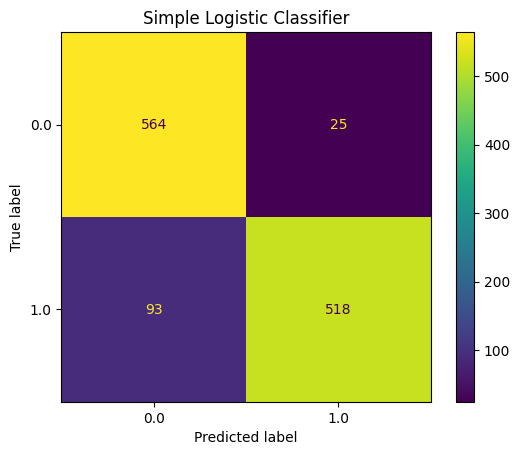

In [89]:
# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000)
model = logreg.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Simple Logistic Classifier')
plt.show()

### Logistic Regression (Optimised)

- Hyperparameters tuning
- Feature normalisations

Best C value: 100
Accuracy: 0.93 (93.00%)
F1 score: 0.9299968887506112 (93.00%)


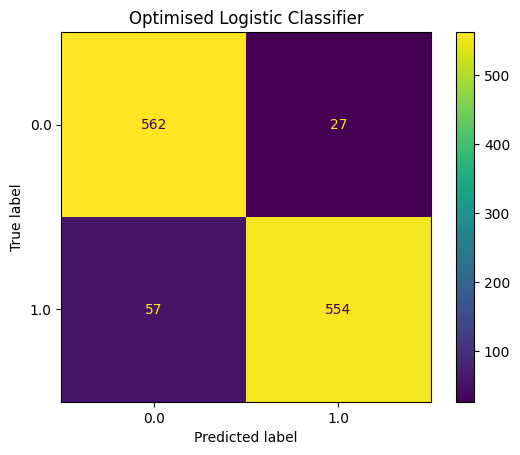

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
f_train_scaled = scaler.fit_transform(f_train)

# Transform the test data with the same scaler
f_test_scaled = scaler.transform(f_test)

# Initialize PCA
pca = PCA()

# Fit and transform the scaled training data
f_train_pca = pca.fit_transform(f_train_scaled)

# Transform the scaled test data
f_test_pca = pca.transform(f_test_scaled)


# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000)

# Define a range of `C` values to try
parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Setup the grid search
clf = GridSearchCV(logreg, parameters, cv=5)
clf.fit(f_train_pca, l_train)

# Best `C` value
print("Best C value:", clf.best_params_['C'])

C = clf.best_params_['C']

# Optimised Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000, C=C)

model = logreg.fit(f_train_pca, l_train)


score = model.score(f_test_pca, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test_pca)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Optimised Logistic Classifier')
plt.show()

### Adding PCA Prelude

Using PCA improves the results, therefore we inject it into the pipeline

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
f_train_scaled = scaler.fit_transform(f_train)

# Transform the test sample data with the same scaler
f_test_scaled = scaler.transform(f_test)

# Transform the test data with the same scaler
f_predict_scaled = scaler.transform(test_data)

# Initialize PCA
pca = PCA()

# Fit and transform the scaled training data
f_train_pca = pca.fit_transform(f_train_scaled)

# Transform the scaled test sample data
f_test_pca = pca.transform(f_test_scaled)

# Transform the scaled test data
f_predict_pca = pca.transform(f_predict_scaled)



### Decision Tree Classifier

Accuracy: 0.96 (96.00%)
F1 score: 0.959986551035209 (96.00%)


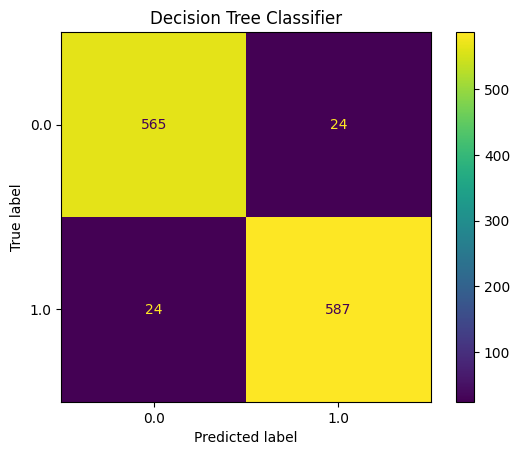

In [ ]:
tree = DecisionTreeClassifier()
model = tree.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Decision Tree Classifier')
plt.show()

### Support Vector Machine Classifier



Accuracy: 0.49833333333333335 (49.83%)
F1 score: 0.34541500543675246 (34.54%)


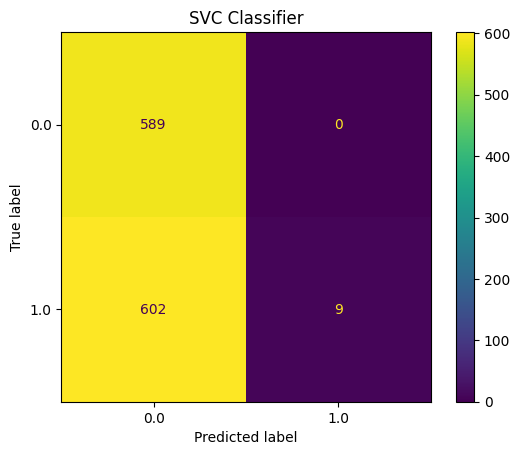

In [ ]:
svc = svm.SVC()
model = svc.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('SVC Classifier')
plt.show()

### Random Forest Classifier

Accuracy: 0.9841666666666666 (98.42%)
F1 score: 0.9841560930593264 (98.42%)


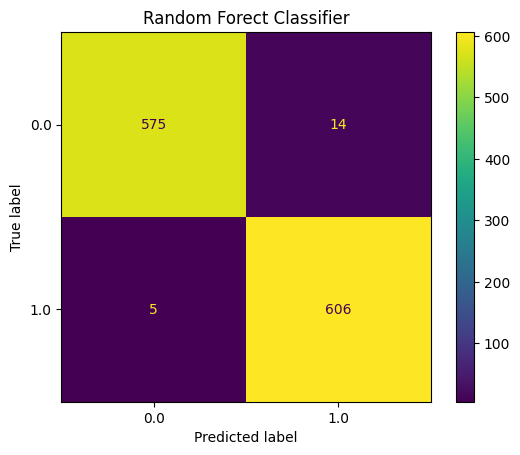

In [90]:
forest = RandomForestClassifier()
model = forest.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Random Forect Classifier')
plt.show()

Trying scaled data

Accuracy: 0.8908333333333334 (89.08%)
F1 score: 0.8905316110863901 (89.05%)


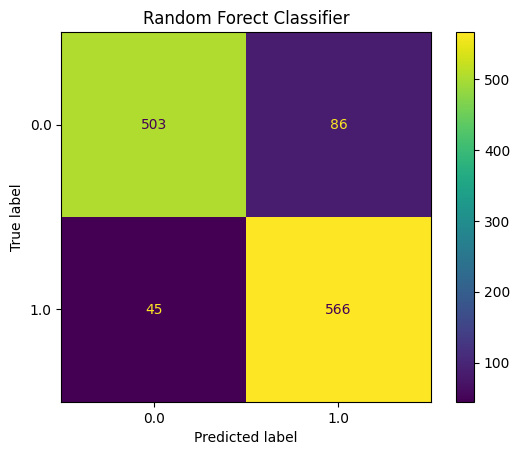

In [91]:
forest = RandomForestClassifier()
model = forest.fit(f_train_pca, l_train)


score = model.score(f_test_pca, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test_pca)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Random Forect Classifier')
plt.show()

### XGB Boost Classifier
<a name="A-2"></a>

Accuracy: 0.99 (99.00%)
F1 score: 0.9899959983993598 (99.00%)


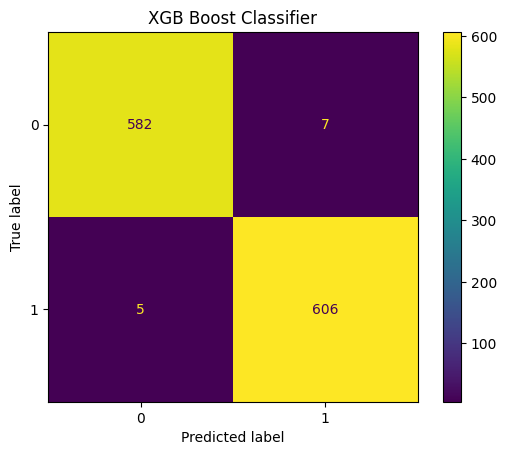

In [161]:
# Use XGB for multiclass classification
xgb_model = xgb.XGBClassifier(random_state=42)
model = xgb_model.fit(f_train, l_train)

score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('XGB Boost Classifier')
plt.show()

### Writing data using XGBoost

<a name="A-3"></a>

In [155]:
xgb_model = xgb.XGBClassifier(random_state=42)
model = xgb_model.fit(f_train, l_train)

predictions = model.predict(test_data)

# Write data to column
test_copy = test_data.copy()
test_copy['label'] = predictions

# Print the output
print(predictions)

# Output the result
test_copy.to_csv('TestingResultsBinary.csv', index=False)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


## Part B

Multiclass classification of logs

Run steps:
 1. [Prelude](#B-1)
 2. [Tuned XGBoost scores (optional)](#B-2)
 3. [Tuned XGBoost output](#B-3)

### Prelude
<a name="B-1"></a>

In [156]:
import pandas as pd
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import neighbors, svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error, r2_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

train_data = pd.read_csv('/content/data/TrainingDataMulti.csv')
test_data = pd.read_csv('/content/data/TestingDataMulti.csv')

# Split features and labels
features = train_data.iloc[:, :-1]
labels = train_data.iloc[:, -1]

# Split the data into training and testing sets
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
f_train_scaled = scaler.fit_transform(f_train)

# Transform the test sample data with the same scaler
f_test_scaled = scaler.transform(f_test)

# Transform the test data with the same scaler
f_predict_scaled = scaler.transform(test_data)

# Initialize PCA
pca = PCA()

# Fit and transform the scaled training data
f_train_pca = pca.fit_transform(f_train_scaled)

# Transform the scaled test sample data
f_test_pca = pca.transform(f_test_scaled)

# Transform the scaled test data
f_predict_pca = pca.transform(f_predict_scaled)



### Random Forest Classifier

Accuracy: 0.9525 (95.25%)
F1 score: 0.9522846874502265 (95.23%)


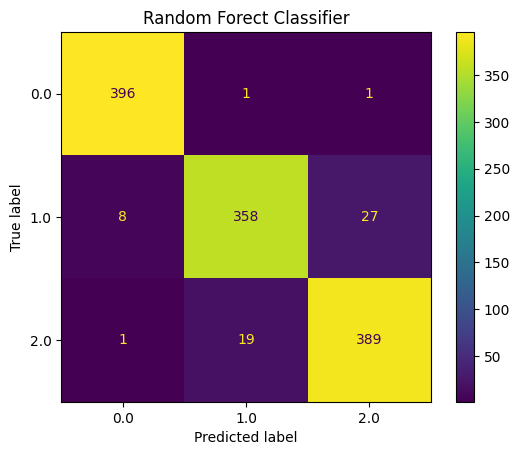

In [95]:
forest = RandomForestClassifier()
model = forest.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Random Forect Classifier')
plt.show()

Scaled

Accuracy: 0.9516666666666667 (95.17%)
F1 score: 0.9515331231909352 (95.15%)


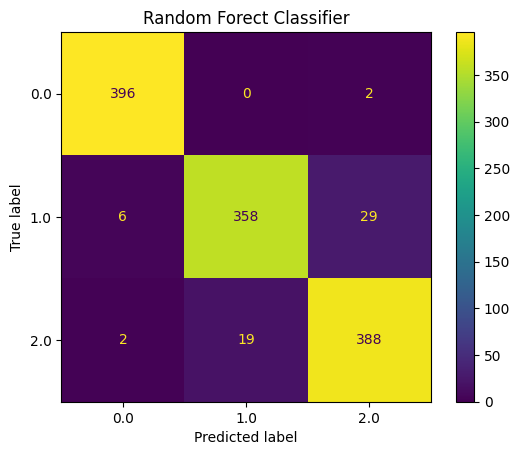

In [96]:
forest = RandomForestClassifier()
model = forest.fit(f_train_scaled, l_train)


score = model.score(f_test_scaled, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test_scaled)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Random Forect Classifier')
plt.show()

### Logistic Regression (Optimised)

In [122]:
# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000)

# Define a range of `C` values to try
parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Setup the grid search
# Adjust n_jobs on weak machines
clf = GridSearchCV(logreg, parameters, cv=3, n_jobs=10)
clf.fit(f_train_scaled, l_train)

# Best `C` value
print("Best C value:", clf.best_params_['C'])

Best C value: 100


Accuracy: 0.6733333333333333 (67.33%)
F1 score: 0.6644630927820483 (66.45%)


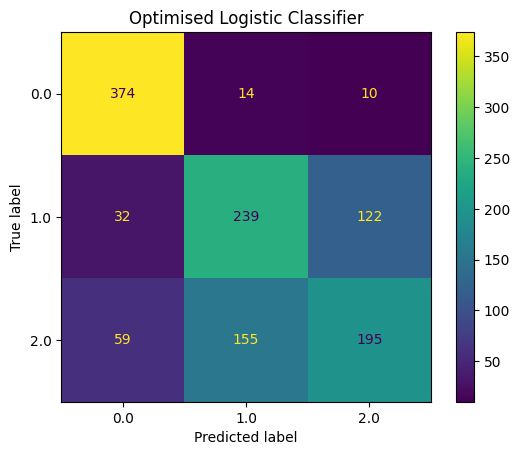

In [123]:
# Optimised Logistic Regression Classifier using C value from above
logreg = LogisticRegression(max_iter=10000, C=100)

model = logreg.fit(f_train_scaled, l_train)


score = model.score(f_test_scaled, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test_scaled)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Optimised Logistic Classifier')
plt.show()

### XGB Boost Classifier

Accuracy: 0.965 (96.50%)
F1 score: 0.9649468238014592 (96.49%)


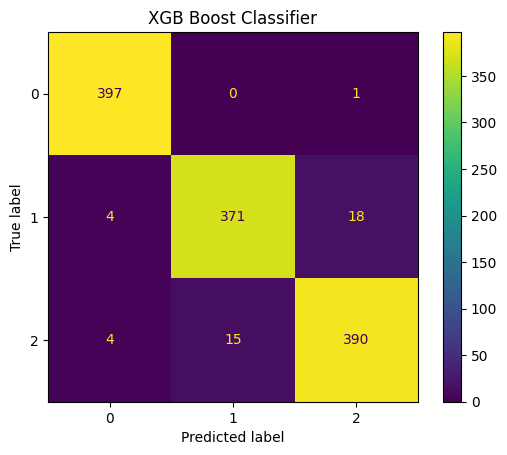

In [98]:
# Use XGB for multiclass classification
xgb_model = xgb.XGBClassifier(random_state=42)
model = xgb_model.fit(f_train, l_train)

score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('XGB Boost Classifier')
plt.show()

### XGB Boost Classifier (Optimised)

#### Computing hyperparameters

In [112]:
xgb_params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 3, 6),
    "n_estimators": randint(100, 150, 300),
    "subsample": uniform(0.5, 1)
}

xgb_model = xgb.XGBClassifier(random_state=42)
# Adjust n_jobs on weak machines
xgb_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=10, return_train_score=True)

xgb_search.fit(f_train_scaled, l_train)

print(xgb_search.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
294 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
 

{'colsample_bytree': 0.7576867056426012, 'gamma': 0.02043430813323943, 'learning_rate': 0.08068051892164936, 'max_depth': 8, 'n_estimators': 427, 'subsample': 0.8476192144826835}


#### Running the model
<a name="B-2"></a>

Accuracy: 0.97 (97.00%)
F1 score: 0.9699129151738807 (96.99%)


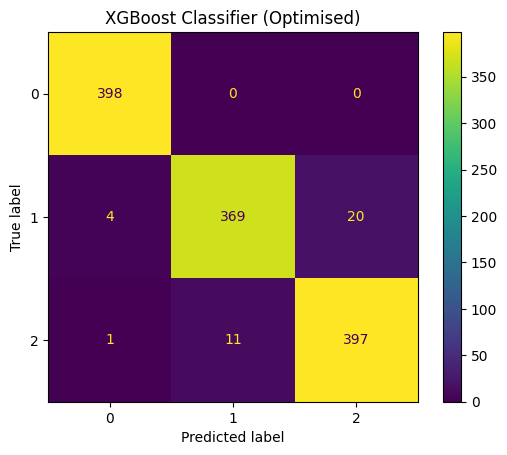

In [157]:
# Use tuned XGB for multiclass classification with hyperparameters calcylated above
xgb_model = xgb.XGBClassifier(random_state=42,
                              colsample_bytree=0.7576867056426012,
                              gamma= 0.02043430813323943,
                              learning_rate= 0.08068051892164936,
                              max_depth= 8,
                              n_estimators=427,
                              subsample=0.8476192144826835)
model = xgb_model.fit(f_train, l_train)

score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('XGBoost Classifier (Optimised)')
plt.show()

### Write data using tuned XGBoost
<a name="B-3"></a>

In [159]:
# Use tuned XGB for multiclass classification with hyperparameters calcylated above
xgb_model = xgb.XGBClassifier(random_state=42,
                              colsample_bytree=0.7576867056426012,
                              gamma= 0.02043430813323943,
                              learning_rate= 0.08068051892164936,
                              max_depth= 8,
                              n_estimators=427,
                              subsample=0.8476192144826835)
model = xgb_model.fit(f_train, l_train)

predictions = model.predict(test_data)

# Write data to column
test_copy = test_data.copy()
test_copy['label'] = predictions

# Print the output
print(predictions)

# Output the result
test_copy.to_csv('TestingResultsMulti.csv', index=False)

[0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 1 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
